In [1]:
# installing tesseract 
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

def imshow(title = 'Image', image = None, size = 10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w / h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()
  


In [3]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
!unzip -qq OCRSamples.zip

--2023-01-17 10:07:33--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.144.42
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.144.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237096 (232K) [application/zip]
Saving to: ‘OCRSamples.zip’

OCRSamples.zip      100%[===================>] 231.54K   869KB/s    in 0.3s    

2023-01-17 10:07:34 (869 KB/s) - ‘OCRSamples.zip’ saved [237096/237096]



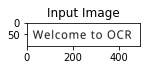

PyTesseract Extracted: Welcome to OCR



In [4]:
img = cv2.imread('OCR Samples/OCR1.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

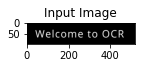

Pytesseract Extracted : Welcome to OCR



In [5]:
# we can change the white text on blackgrounds
img = cv2.imread('OCR Samples/OCR2.png')
imshow("Input Image", img)

output_txt = pytesseract.image_to_string(img)

print("Pytesseract Extracted : {}".format(output_txt))

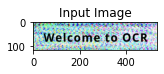

Pytesseract Extracted :  



In [6]:
#There is a solution for messy backgrounds
img = cv2.imread('OCR Samples/OCR3.png')

imshow("Input Image", img)

output_txt = pytesseract.image_to_string(img)

print("Pytesseract Extracted : {}".format(output_txt))

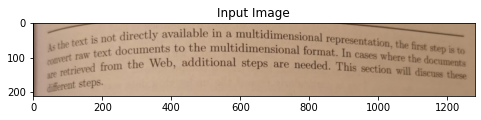

Pytesseract Extracted : directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [8]:
#example from a real life scan

img = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", img, size = 48)

output_txt = pytesseract.image_to_string(img)

print("Pytesseract Extracted : {}".format(output_txt))

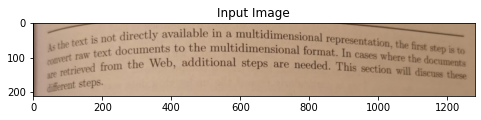

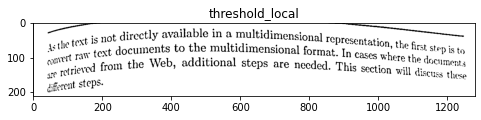

Pytesseract Extracted: j a j multidimensional r
irectly available in a 4
ne text is not direct nts to the multidimensional form,
Ath aw text fo Web, additional steps are necde
‘onl

Cpresentation, the first step is to
at. In cases where the documents

d. This section will discuss these
convert r

are ret rieved fr
diferent StePS-



In [10]:
# At this step we have to clean-up our images

from skimage.filters import threshold_local

image = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", image, size = 48)

# now we get the value component from the HSV color space
# after that we apply adaptivel thresholding into

V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

thr = (V > T).astype("uint8") * 255
imshow("threshold_local", thr, size = 48)

output_txt = pytesseract.image_to_string(thr)
print("Pytesseract Extracted: {}".format(output_txt))

In [11]:
#test image
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2023-01-17 10:38:24--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2023-01-17 10:38:24--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.01s   

2023-01-17 10:38:24 (6.69 MB/s) - ‘Receipt-woolworth.jpg’ s

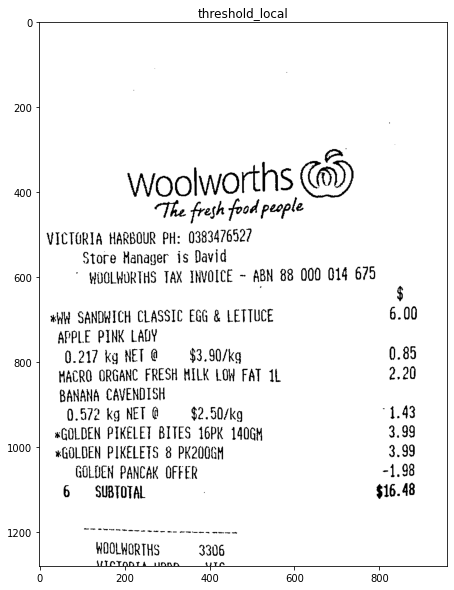

Pytesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [13]:
from skimage.filters import threshold_local

image = cv2.imread('Receipt-woolworth.jpg')

V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method = "gaussian")

thr = (V > T).astype("uint8") * 255
imshow("threshold_local", thr)

output_txt = pytesseract.image_to_string(thr)
print("Pytesseract Extracted: {}".format(output_txt))

In [16]:
from pytesseract import Output

d = pytesseract.image_to_data(thr, output_type= Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


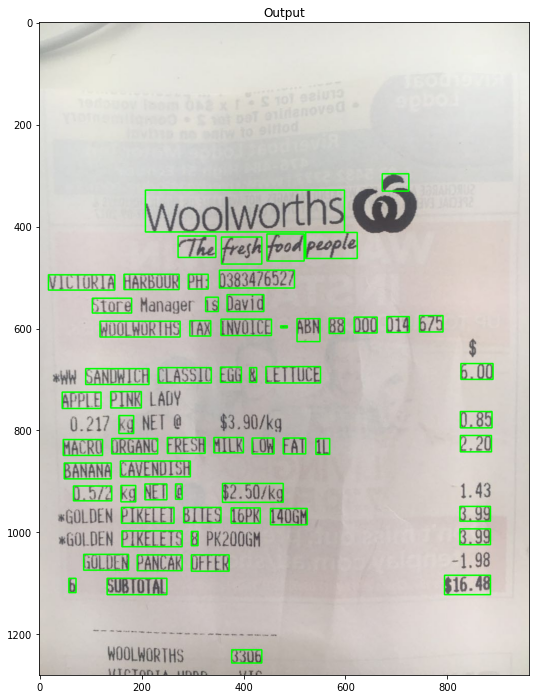

In [20]:
n_boxes = len(d['text'])

for i in range(n_boxes):
  if int(d['conf'][i]) > 50:
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    image = cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0),2)

imshow('Output', image, size = 12)    